<a href="https://colab.research.google.com/github/evertonrca/Data-Science-Studies/blob/main/Exerc%C3%ADcio_aplicando_random_forest_e_dec_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aplicação dos estudos realizados a partir do curso Data Science do Zero, foram utilizados os algoritmos Randon Forest e Decision Tree**



# Random Forest


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Importando o banco de dados

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('drive/MyDrive/Colab Notebooks/Data Science do Zero/Módulo 8 - Machine Learning/materiais-apoio-random-forest/random-forest-materiais-apoio/xAPI-Edu-Data.csv')

In [4]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,15,16,2,20,Yes,Good,Under-7,M
1,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,20,20,3,25,Yes,Good,Under-7,M
2,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,10,7,0,30,No,Bad,Above-7,L
3,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,30,25,5,35,No,Bad,Above-7,L
4,M,KW,KuwaIT,lowerlevel,G-04,A,IT,F,Father,40,50,12,50,No,Bad,Above-7,M


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   gender                    480 non-null    object
 1   NationalITy               480 non-null    object
 2   PlaceofBirth              480 non-null    object
 3   StageID                   480 non-null    object
 4   GradeID                   480 non-null    object
 5   SectionID                 480 non-null    object
 6   Topic                     480 non-null    object
 7   Semester                  480 non-null    object
 8   Relation                  480 non-null    object
 9   raisedhands               480 non-null    int64 
 10  VisITedResources          480 non-null    int64 
 11  AnnouncementsView         480 non-null    int64 
 12  Discussion                480 non-null    int64 
 13  ParentAnsweringSurvey     480 non-null    object
 14  ParentschoolSatisfaction  

In [6]:
df.shape

(480, 17)

In [7]:
df['Class'].value_counts()

M    211
H    142
L    127
Name: Class, dtype: int64

# Convertendo categorias com o label encoder

In [8]:
# Convertendo os dados de string para int (categóricos)
carac = df
colum_carac = carac.dtypes.pipe(lambda carac: carac[carac=='object']).index
for coluna in colum_carac:
  label = LabelEncoder()
  carac[coluna] = label.fit_transform(carac[coluna])

In [9]:
df.head()

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
0,1,4,4,2,1,0,7,0,0,15,16,2,20,1,1,1,2
1,1,4,4,2,1,0,7,0,0,20,20,3,25,1,1,1,2
2,1,4,4,2,1,0,7,0,0,10,7,0,30,0,0,0,1
3,1,4,4,2,1,0,7,0,0,30,25,5,35,0,0,0,1
4,1,4,4,2,1,0,7,0,0,40,50,12,50,0,0,0,2


# Separando dados de treino e teste e treinando o modelo random forest vs arvore de decisão

In [10]:
# Importando bibliotecas
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [11]:
treino = df.drop(columns='Class')

In [12]:
classes = df['Class']

In [13]:
randomf = RandomForestClassifier(random_state=42)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(treino, classes, test_size=0.30, random_state=42)

In [15]:
randomf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [16]:
print(classification_report(y_test, randomf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.78      0.68      0.72        31
           1       0.87      0.87      0.87        45
           2       0.78      0.82      0.80        68

    accuracy                           0.81       144
   macro avg       0.81      0.79      0.80       144
weighted avg       0.81      0.81      0.80       144



#### Explorando árvores da floresta

In [17]:
print(f'Número total de árvores geradas: {len(randomf.estimators_)}')
for tree in randomf.estimators_:
    print("\nNumero de nós: {}".format(tree.tree_.node_count))
    print("Profundidade da árvore: {}".format(tree.tree_.max_depth))
    print("Features importantes: {}".format(tree.feature_importances_))
    print("\nObjeto: {}".format(tree))

Número total de árvores geradas: 100

Numero de nós: 167
Profundidade da árvore: 13
Features importantes: [0.01357576 0.01823389 0.12828917 0.00226263 0.03935266 0.00528274
 0.0299558  0.01916257 0.02634581 0.21964509 0.13038868 0.08298179
 0.08732524 0.04969152 0.04295619 0.10455045]

Objeto: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1608637542, splitter='best')

Numero de nós: 145
Profundidade da árvore: 14
Features importantes: [0.03186919 0.03310262 0.01141583 0.00477019 0.01988081 0.03413417
 0.04478122 0.01190338 0.02845579 0.03441715 0.34523753 0.13909319
 0.13276113 0.01510238 0.00618357 0.10689184]

Objeto: DecisionTree

In [18]:
# Treinando modelo de arvore de decisão
from sklearn import tree

In [19]:
arvore = tree.DecisionTreeClassifier(random_state=42)

In [20]:
arvore.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [21]:
print(classification_report(y_test, arvore.predict(X_test)))

              precision    recall  f1-score   support

           0       0.65      0.55      0.60        31
           1       0.73      0.73      0.73        45
           2       0.64      0.69      0.67        68

    accuracy                           0.67       144
   macro avg       0.68      0.66      0.67       144
weighted avg       0.67      0.67      0.67       144



# Mudando o valor de max_depth (profundidade da árvore)

In [22]:
# Criando uma função para verificar o overfitting do modelo
def algorandom (max_depth):
  if max_depth == 0:
    randomf = RandomForestClassifier(random_state=42)
  else:
    randomf = RandomForestClassifier(random_state=42, max_depth=max_depth)
  randomf.fit(X_train, y_train)

  score_train = randomf.score(X_train, y_train)
  score_test = randomf.score (X_test, y_test)
  print('Teste de acurácia',f'\nValor de depth = {max_depth},', f'Treino = {score_train},', f'Teste = {score_test}')

  return

In [23]:
# Aplicando a função em um looping para identificar o melhor valor
for numero in range(1,21):
  algorandom(numero)
  # O valor de depth igual a 4 foi o que apresenntou melhor resultado, evitando o overfitiing 

Teste de acurácia 
Valor de depth = 1, Treino = 0.6547619047619048, Teste = 0.6875
Teste de acurácia 
Valor de depth = 2, Treino = 0.7738095238095238, Teste = 0.7569444444444444
Teste de acurácia 
Valor de depth = 3, Treino = 0.8154761904761905, Teste = 0.7638888888888888
Teste de acurácia 
Valor de depth = 4, Treino = 0.8511904761904762, Teste = 0.8055555555555556
Teste de acurácia 
Valor de depth = 5, Treino = 0.9107142857142857, Teste = 0.8055555555555556
Teste de acurácia 
Valor de depth = 6, Treino = 0.9523809523809523, Teste = 0.8125
Teste de acurácia 
Valor de depth = 7, Treino = 0.9761904761904762, Teste = 0.7986111111111112
Teste de acurácia 
Valor de depth = 8, Treino = 0.9910714285714286, Teste = 0.7986111111111112
Teste de acurácia 
Valor de depth = 9, Treino = 1.0, Teste = 0.8125
Teste de acurácia 
Valor de depth = 10, Treino = 1.0, Teste = 0.7986111111111112
Teste de acurácia 
Valor de depth = 11, Treino = 1.0, Teste = 0.7986111111111112
Teste de acurácia 
Valor de depth 

In [24]:
# Construindo a mesma lógica para a Árvore de dedcisão
def algodecisao (max_depth):
  if max_depth == 0:
    arvore = tree.DecisionTreeClassifier(random_state=42)
  else:
    arvore = tree.DecisionTreeClassifier(random_state=42, max_depth=max_depth)
  arvore.fit(X_train, y_train)

  score_train = arvore.score(X_train, y_train)
  score_test = arvore.score(X_test, y_test)
  print('Teste de acurácia',f'\nValor de depth = {max_depth},', f'Treino = {score_train},', f'Teste = {score_test}')

  return

In [25]:
# Aplicando a função em um looping
for numero in range(1,21):
  algodecisao(numero)
# O valor de depth = 3 foi o que apresentou o melhor resultado, evitando o overfitting

Teste de acurácia 
Valor de depth = 1, Treino = 0.5416666666666666, Teste = 0.5
Teste de acurácia 
Valor de depth = 2, Treino = 0.7023809523809523, Teste = 0.6666666666666666
Teste de acurácia 
Valor de depth = 3, Treino = 0.7470238095238095, Teste = 0.7152777777777778
Teste de acurácia 
Valor de depth = 4, Treino = 0.8005952380952381, Teste = 0.6944444444444444
Teste de acurácia 
Valor de depth = 5, Treino = 0.8422619047619048, Teste = 0.6805555555555556
Teste de acurácia 
Valor de depth = 6, Treino = 0.875, Teste = 0.6527777777777778
Teste de acurácia 
Valor de depth = 7, Treino = 0.9226190476190477, Teste = 0.6666666666666666
Teste de acurácia 
Valor de depth = 8, Treino = 0.9553571428571429, Teste = 0.6458333333333334
Teste de acurácia 
Valor de depth = 9, Treino = 0.9672619047619048, Teste = 0.6597222222222222
Teste de acurácia 
Valor de depth = 10, Treino = 0.9851190476190477, Teste = 0.6458333333333334
Teste de acurácia 
Valor de depth = 11, Treino = 0.9940476190476191, Teste = 

# Aplicando os testes de validação cruzada

In [52]:
def validacaocruz_random (cv):
  randomf = RandomForestClassifier(max_depth=4, random_state=42)
  resultado_randomf = cross_val_predict(randomf, treino, classes, cv = cv)
  report = classification_report(classes, resultado_randomf)
  acuracia = cross_val_score(randomf, treino, classes, cv = cv)
  print(report)
  print(f'Acurácia das partições {acuracia}', f'\n\nAcurácia média do modelo {acuracia.mean()}')
  return 

In [53]:
validacaocruz_random(10)

              precision    recall  f1-score   support

           0       0.70      0.63      0.66       142
           1       0.82      0.77      0.79       127
           2       0.65      0.71      0.68       211

    accuracy                           0.70       480
   macro avg       0.72      0.71      0.71       480
weighted avg       0.71      0.70      0.70       480

Acurácia das partições [0.66666667 0.6875     0.66666667 0.66666667 0.70833333 0.72916667
 0.64583333 0.72916667 0.83333333 0.70833333] 

Acurácia média do modelo 0.7041666666666666


#### Árvore de decisão

In [28]:
def validacaocruz_arvore (cv):
  arvore = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
  resultado_arvore = cross_val_predict(arvore, treino, classes, cv = cv)
  report = classification_report(classes, resultado_arvore)
  acuracia = cross_val_score(arvore, treino, classes, cv = cv)
  print(report)
  print(f'Acurácia das partições {acuracia}', f'\n\nAcurácia média do modelo {acuracia.mean()}')
  return 

In [29]:
validacaocruz_arvore(10)

              precision    recall  f1-score   support

           0       0.62      0.67      0.65       142
           1       0.81      0.76      0.79       127
           2       0.63      0.62      0.63       211

    accuracy                           0.67       480
   macro avg       0.69      0.68      0.69       480
weighted avg       0.68      0.67      0.67       480

Acurácia das partições [0.75       0.64583333 0.64583333 0.66666667 0.58333333 0.52083333
 0.64583333 0.70833333 0.85416667 0.70833333] 

Acurácia média do modelo 0.6729166666666667


# Verificando as features

In [30]:
randomf.feature_importances_

array([0.0329676 , 0.03769887, 0.03108423, 0.01358451, 0.0331206 ,
       0.01904412, 0.04192284, 0.01199052, 0.04393174, 0.16490779,
       0.19238494, 0.10684686, 0.09583997, 0.04048046, 0.02329476,
       0.11090018])

In [31]:
best_features = pd.Series(randomf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
print(best_features)

VisITedResources            0.192385
raisedhands                 0.164908
StudentAbsenceDays          0.110900
AnnouncementsView           0.106847
Discussion                  0.095840
Relation                    0.043932
Topic                       0.041923
ParentAnsweringSurvey       0.040480
NationalITy                 0.037699
GradeID                     0.033121
gender                      0.032968
PlaceofBirth                0.031084
ParentschoolSatisfaction    0.023295
SectionID                   0.019044
StageID                     0.013585
Semester                    0.011991
dtype: float64


In [32]:
# Plotando o gráfico de importância das features
def plot_grafico (lista):
  %matplotlib inline
  plt.figure(figsize=(14,8))
  plt.style.use('classic')
  sns.barplot(x = lista, y = lista.index)

  plt.title('Características importantes')
  plt.xlabel('Importância (%)')
  plt.ylabel('Característica')

  plt.show()

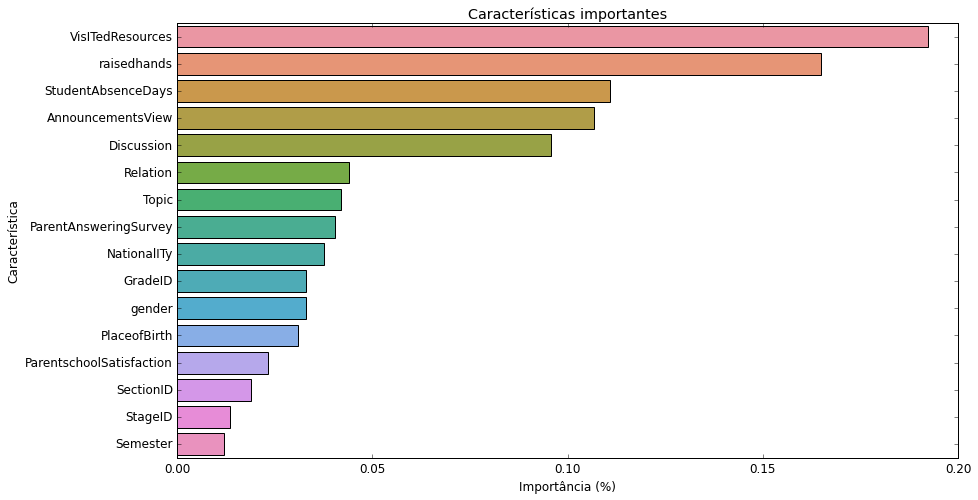

In [33]:
plot_grafico(best_features)

In [34]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


# Excluindo features de menor importância

In [35]:
# Testando o modelo apenas com os valores de importância acima de 4%
new_features = []
excluidas = []
for caracteristica, importancia in best_features.iteritems():
  if importancia > 0.04:
    print(f'característica {caracteristica}        importância {importancia}')
    new_features.append(caracteristica)
  else:
    excluidas.append(caracteristica)
    continue

característica VisITedResources        importância 0.1923849393640904
característica raisedhands        importância 0.16490779030636074
característica StudentAbsenceDays        importância 0.1109001826500748
característica AnnouncementsView        importância 0.10684686322099576
característica Discussion        importância 0.09583997010574757
característica Relation        importância 0.04393174375929167
característica Topic        importância 0.041922842943715156
característica ParentAnsweringSurvey        importância 0.0404804630604466


In [36]:
print(f'Utilizadas:  {new_features}')
print(f'Excluídas:  {excluidas}')

Utilizadas:  ['VisITedResources', 'raisedhands', 'StudentAbsenceDays', 'AnnouncementsView', 'Discussion', 'Relation', 'Topic', 'ParentAnsweringSurvey']
Excluídas:  ['NationalITy', 'GradeID', 'gender', 'PlaceofBirth', 'ParentschoolSatisfaction', 'SectionID', 'StageID', 'Semester']


# Treinando o modelo com as features acima de 4%

In [37]:
def validacaocruz_random (cv):
  randomf = RandomForestClassifier(n_estimators = 100, max_depth=4, random_state=42)
  resultado_randomf = cross_val_predict(randomf, treino[new_features], classes, cv = cv)
  report = classification_report(classes, resultado_randomf)
  acuracia = cross_val_score(randomf, treino[new_features], classes, cv = cv)
  print(report)
  print(f'Acurácia das partições {acuracia}', f'\n\nAcurácia média do modelo {acuracia.mean()}')
  return 

In [38]:
validacaocruz_random(10)

              precision    recall  f1-score   support

           0       0.67      0.62      0.64       142
           1       0.83      0.81      0.82       127
           2       0.65      0.69      0.67       211

    accuracy                           0.70       480
   macro avg       0.72      0.71      0.71       480
weighted avg       0.70      0.70      0.70       480

Acurácia das partições [0.72916667 0.6875     0.6875     0.70833333 0.70833333 0.66666667
 0.60416667 0.79166667 0.70833333 0.72916667] 

Acurácia média do modelo 0.7020833333333333


In [39]:
def validacaocruz_arvore (cv):
  arvore = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
  resultado_arvore = cross_val_predict(arvore, treino[new_features], classes, cv = cv)
  report = classification_report(classes, resultado_arvore)
  acuracia = cross_val_score(arvore, treino[new_features], classes, cv = cv)
  print(report)
  print(f'Acurácia das partições {acuracia}', f'\n\nAcurácia média do modelo {acuracia.mean()}')
  return 

In [40]:
validacaocruz_arvore(10)

              precision    recall  f1-score   support

           0       0.63      0.65      0.64       142
           1       0.81      0.76      0.79       127
           2       0.63      0.64      0.63       211

    accuracy                           0.68       480
   macro avg       0.69      0.68      0.69       480
weighted avg       0.68      0.68      0.68       480

Acurácia das partições [0.75       0.64583333 0.64583333 0.6875     0.58333333 0.52083333
 0.64583333 0.70833333 0.85416667 0.70833333] 

Acurácia média do modelo 0.675


In [41]:
# Não aconteceram melhorias significativas

# Utilizando GridSearchCV para melhorar os resultados


In [42]:
# Definindo os melhores parâmetros para min_samples_split, min_samples_leaf, max_depth e max_features
from sklearn.model_selection import GridSearchCV

In [43]:
# min_samples_split, min_samples_leaf, max_depth e max_features
criterion = ['gini', 'entropy']
min_samples_leaf = [1, 3, 5, 7, 10, 15]
min_samples_split = [2, 5, 7, 10, 15]
max_depth = [10, 50, 100, 150, 200]
n_estimators = [10, 30, 50, 100, 150, 200]

In [44]:
parametros_grid = dict(n_estimators = n_estimators, criterion = criterion,
                   max_depth = max_depth, min_samples_split = min_samples_split,
                   min_samples_leaf = min_samples_leaf)

In [45]:
print(parametros_grid)

{'n_estimators': [10, 30, 50, 100, 150, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [10, 50, 100, 150, 200], 'min_samples_split': [2, 5, 7, 10, 15], 'min_samples_leaf': [1, 3, 5, 7, 10, 15]}


In [46]:
randomf = RandomForestClassifier()

In [47]:
grid = GridSearchCV(randomf, parametros_grid, scoring='accuracy', cv = 10)

In [48]:
grid.fit(treino, classes)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rand

In [49]:
grid.best_score_

0.74375

In [50]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 200,
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 10}

In [51]:
grid.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=200, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Houve melhora no resultado quando aplicado o GridSearch, a acurácia passou de 70.2% para 74.37%